In [ ]:
!git clone https://github.com/spMohanty/PlantVillage-Dataset.git


Cloning into 'PlantVillage-Dataset'...
remote: Enumerating objects: 163235, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 163235 (delta 2), reused 0 (delta 0), pack-reused 163229 (from 1)
Receiving objects: 100% (163235/163235), 2.00 GiB | 34.55 MiB/s, done.
Resolving deltas: 100% (101/101), done.
Updating files: 100% (182401/182401), done.


Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.
Epoch 1/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 702s 512ms/step - accuracy: 0.4628 - loss: 1.9922 - val_accuracy: 0.5159 - val_loss: 1.7330
Epoch 2/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 688s 507ms/step - accuracy: 0.7709 - loss: 0.7412 - val_accuracy: 0.8022 - val_loss: 0.6443
Epoch 3/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 670s 494ms/step - accuracy: 0.8549 - loss: 0.4586 - val_accuracy: 0.8195 - val_loss: 0.5699
Epoch 4/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 672s 495ms/step - accuracy: 0.8893 - loss: 0.3569 - val_accuracy: 0.8769 - val_loss: 0.3909
Epoch 5/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 668s 492ms/step - accuracy: 0.9095 - loss: 0.2815 - val_accuracy: 0.8143 - val_loss: 0.6268
Epoch 6/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 669s 493ms/step - accuracy: 0.9208 - loss: 0.2467 - val_accuracy: 0.8899 - val_loss: 0.3470
Epoch 7/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 674s 497ms/step - accu

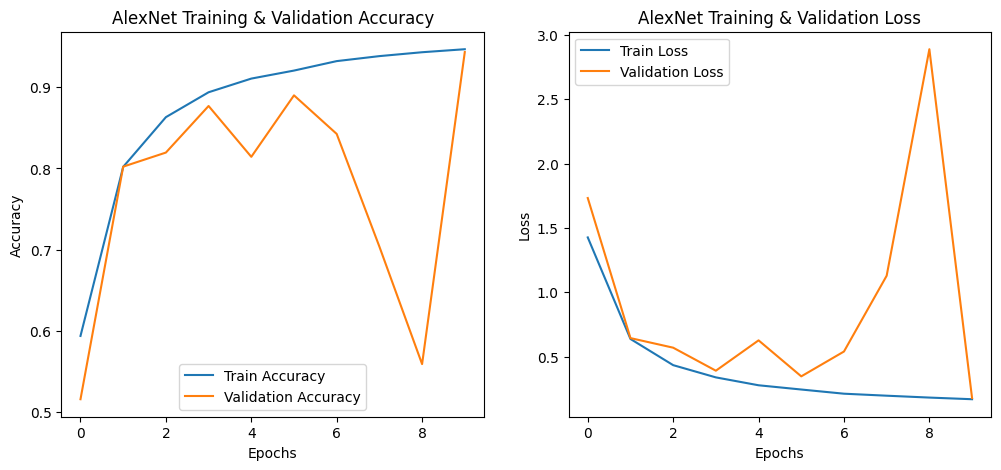

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split

dataset_dir = "/content/PlantVillage-Dataset/raw/color"

# Image parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 
)

# Train dataset (60%)
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

# Validation dataset (20%)
val_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  
)

# Test dataset (20%) - Different subset
test_generator = test_datagen.flow_from_directory(
    dataset_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',  
    shuffle=False
)

# Define AlexNet model
def build_alexnet(input_shape, num_classes):
    model = Sequential([
        Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D((3, 3), strides=2),

        Conv2D(256, (5, 5), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D((3, 3), strides=2),

        Conv2D(384, (3, 3), padding='same', activation='relu'),
        Conv2D(384, (3, 3), padding='same', activation='relu'),
        Conv2D(256, (3, 3), padding='same', activation='relu'),
        MaxPooling2D((3, 3), strides=2),

        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    return model

# Get the number of classes from train_generator
num_classes = train_generator.num_classes
input_shape = (224, 224, 3)  

# Build the AlexNet model
alexnet_model = build_alexnet(input_shape, num_classes)

# Compile the model
alexnet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history_alexnet = alexnet_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    batch_size=32
)

# Evaluate the model on the test set
test_loss, test_acc = alexnet_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Plot accuracy & loss graphs
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('AlexNet Training & Validation Accuracy')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('AlexNet Training & Validation Loss')

    plt.show()

# Call the function to plot graphs
plot_training_history(history_alexnet)


# accuracy 94.87%


In [ ]:
alexnet_model.save('/content/drive/MyDrive/AlexNet_PlantDisease.h5')  # Saves as HDF5 file
